In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/3_outlier_IQR/Exercise/height_weight.csv")

In [3]:
data.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

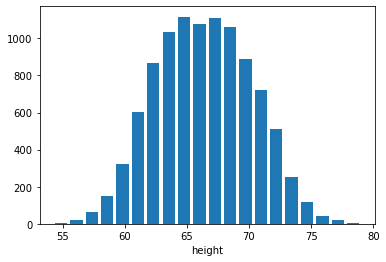

In [10]:
plt.hist(data["height"],bins=20,rwidth=0.8)
plt.xlabel("height")
plt.show()

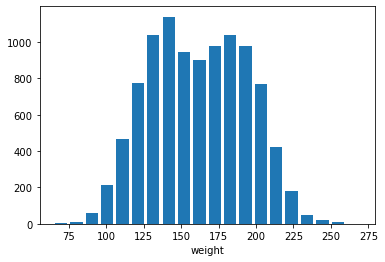

In [9]:
plt.hist(data["weight"],bins=20,rwidth=0.8)
plt.xlabel("weight")
plt.show()

In [12]:
q1=data["height"].quantile(0.25)
q2=data["height"].quantile(0.75)
q1,q2

(63.505620481218955, 69.1742617268347)

In [13]:
iqr_h=q2-q1
iqr_h

5.668641245615746

In [18]:
lower_h=q1-1.5*iqr_h
upper_h=q2+1.5*iqr_h
upper_h,lower_h

(77.67722359525831, 55.00265861279534)

In [19]:
data[(data["height"]>upper_h)|(data["height"]<lower_h)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [20]:
q1w=data["weight"].quantile(0.25)
q3w=data["weight"].quantile(0.75)
q1w,q3w

(135.8180513055015, 187.16952486868348)

In [21]:
iqr_w=q3w-q1w
iqr_w

51.35147356318197

In [22]:
lower_w=q1w-1.5*iqr_w
upper_w=q3w+1.5*iqr_w
upper_w,lower_w

(264.19673521345646, 58.79084096072856)

In [24]:
data[(data["weight"]>upper_w)|(data["weight"]<lower_w)]

,gender,height,weight
2014,Male,78.998742,269.989699


In [28]:
data_new = data[(data["weight"]<upper_w)&(data["weight"]>lower_w)&(data["height"]<upper_h)&(data["height"]>lower_h)]

In [29]:
data_new.shape

(9992, 3)

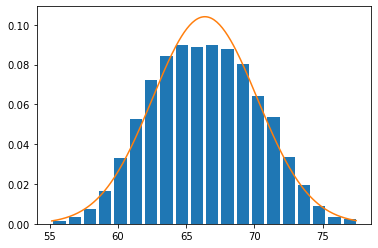

In [43]:
from scipy.stats import norm
plt.hist(data_new["height"],bins=20,rwidth=0.8,density=True)
rng=np.arange(data_new["height"].min(),data_new["height"].max(),0.1)
plt.plot(rng,norm.pdf(rng,data_new["height"].mean(),data_new["height"].std()))
plt.show()

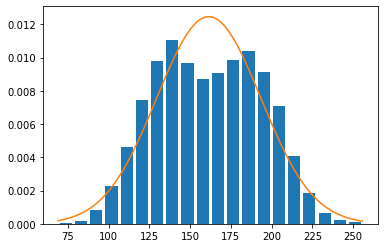

In [44]:
plt.hist(data_new["weight"],bins=20,rwidth=0.8,density=True)
rng=np.arange(data_new["weight"].min(),data_new["weight"].max(),0.1)
plt.plot(rng,norm.pdf(rng,data_new["weight"].mean(),data_new["weight"].std()))
plt.show()